In [17]:
import pandas as pd

from PSpline import *
from matplotlib import pyplot as plt

In [18]:
p_spline = PSpline()

## Tuning with cross- validation ( Motorcycle data)

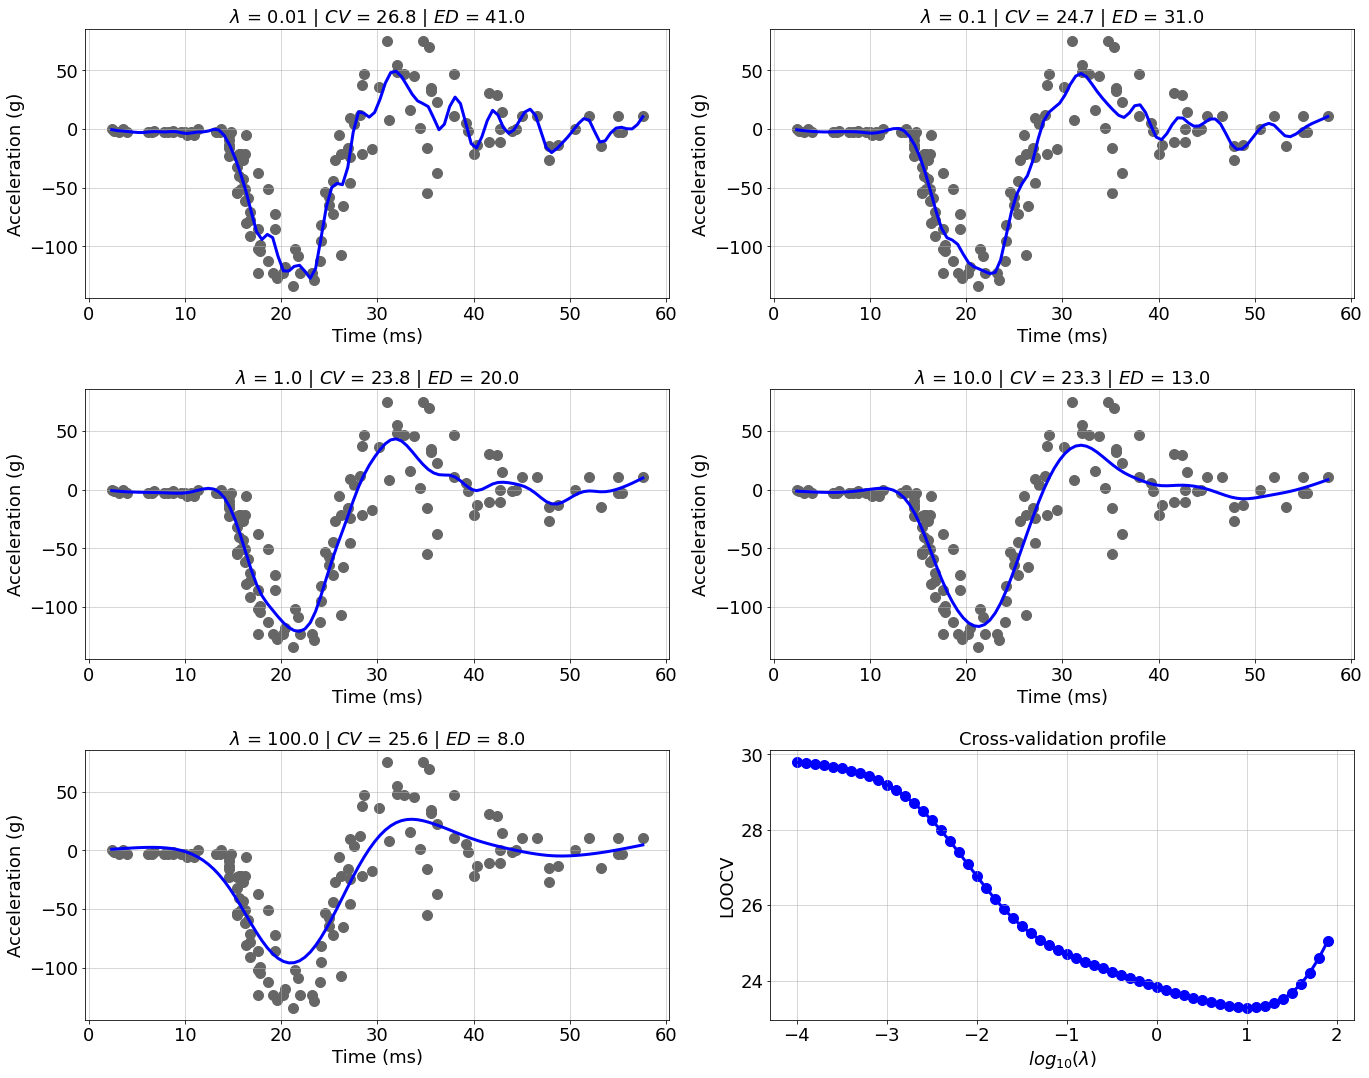

In [56]:
# Get the data
mcycle = sm.datasets.get_rdataset('mcycle', 'MASS').data
x = mcycle.times
y = mcycle.accel

# Basis parameters
n_seg = 50
b_deg = 3
p_ord = 2

fig_row, fig_col = 3, 2
fig, axs = plt.subplots(fig_row, fig_col, figsize=(20, 16))
fig.tight_layout(pad=7.0)
row, col = -1, 0

# Explore 5 lambdas
alphas = np.array([10 ** x for x in range(-2, 3)])
F1 = pd.DataFrame({'x': x, 'y': y})
for k in range(len(alphas)):
    # Fit P-splines
    fit = p_spline.ps_normal(x, y, n_seg=n_seg, b_deg=b_deg, p_ord=p_ord, alpha=alphas[k])
    F2 = pd.DataFrame({'xg': fit['x_grid'], 'yg': fit['y_grid']})

    # Build the graphs
    row, col = p_spline.plt_axs_idx(k, fig_col, row, col)
    axs[row, col].scatter(F1.x, F1.y, facecolors='#666666', s=100, zorder=1)
    axs[row, col].plot(F2.xg, F2.yg, c='b', zorder=2, linewidth=3)
    axs[row, col].set_title(
        f"$\lambda$ = {alphas[k]} | $CV$ = {round(fit['cv'], 1)} | $ED$ = {round(fit['eff_dim'], 0)}", fontsize=18)
    axs[row, col].tick_params(axis='both', labelsize=18)
    axs[row, col].set_xlabel('Time (ms)', fontsize=18)
    axs[row, col].set_ylabel('Acceleration (g)', fontsize=18)
    axs[row, col].grid(linewidth=0.5)

# Calculate CV on log grid for lambda
llambs = np.arange(-4, 2, .1)
alphas = 10 ** llambs
cvs = []
for alpha in alphas:
    fit = p_spline.ps_normal(x, y, n_seg=n_seg, b_deg=b_deg, p_ord=p_ord, alpha=alpha)
    cvs.append(fit['cv'])

F3 = pd.DataFrame({'x': llambs, 'y': cvs})
cv_plot_row , cv_plot_col = 2, 1
axs[cv_plot_row, cv_plot_col].scatter(F3.x, F3.y, facecolors='b', s=100, zorder=1)
axs[cv_plot_row, cv_plot_col].plot(F3.x, F3.y, c='b', zorder=2, linewidth=3)
axs[cv_plot_row, cv_plot_col].set_title("Cross-validation profile",  fontsize=18)
axs[cv_plot_row, cv_plot_col].tick_params(axis='both', labelsize=18)
axs[cv_plot_row, cv_plot_col].grid(linewidth=0.5)
axs[cv_plot_row, cv_plot_col].set_xlabel('$log_{10}(\lambda)$', fontsize=18)
axs[cv_plot_row, cv_plot_col].set_ylabel('LOOCV', fontsize=18)

plt.savefig('../images/tuning_with_cross-validation_Motorcycle_data.png')
plt.show()